In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
data.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [6]:
from sklearn import preprocessing

In [7]:
norm=preprocessing.normalize(data)

In [8]:
norm_df=pd.DataFrame(norm,columns=data.columns)
norm_df.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


In [9]:
norm_df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.040677,0.881704,0.409630,0.119341
std,0.015018,0.101645,0.166944,0.035642
min,0.012626,0.473419,0.132112,0.042620
25%,0.027485,0.850453,0.279234,0.092741
50%,0.039406,0.907323,0.395010,0.117441
75%,0.049811,0.952031,0.508929,0.139552
max,0.079346,0.989371,0.854213,0.207893


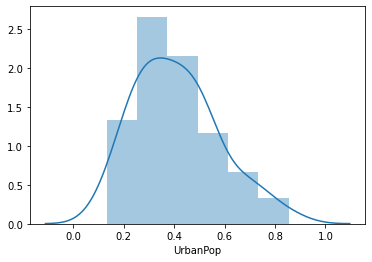

In [10]:
sns.distplot(norm_df['UrbanPop'])

In [11]:
from sklearn.cluster import KMeans

In [12]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=0).fit(norm_df)
    wcss.append(kmeans.inertia_)
    print(kmeans)
    print(kmeans.inertia_)
    print(kmeans.labels_)


KMeans(n_clusters=1, random_state=0)
1.9452076233849003
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
KMeans(n_clusters=2, random_state=0)
0.7540963759591796
[0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 1 0]
KMeans(n_clusters=3, random_state=0)
0.3278478050693132
[1 1 1 1 1 1 0 1 1 1 2 0 1 0 2 0 0 1 0 1 0 1 2 1 1 0 0 1 2 0 1 1 1 2 0 0 0
 0 0 1 0 1 1 0 0 1 0 0 2 1]
KMeans(n_clusters=4, random_state=0)
0.22760245765174864
[1 1 1 1 1 3 0 1 1 1 2 3 1 0 2 0 3 1 0 1 0 1 2 1 3 3 0 1 2 0 1 1 1 2 0 3 3
 0 3 1 3 1 3 0 0 3 3 3 2 3]
KMeans(n_clusters=5, random_state=0)
0.16395152491640724
[1 1 1 1 1 2 0 1 1 1 3 2 1 0 4 0 2 1 0 1 0 1 4 1 2 2 0 1 4 0 1 1 1 4 0 2 2
 0 2 1 2 1 2 0 0 2 2 2 4 2]
KMeans(n_clusters=6, random_state=0)
0.12059896172575112
[0 0 2 2 2 5 1 2 0 2 3 5 2 1 4 1 5 2 1 0 1 2 4 0 5 5 1 2 4 1 0 2 0 4 1 5 5
 1 5 0 5 2 5 1 1 5 5 5 4 2]
KMeans(n_clusters=7, random_state=0)
0.0998

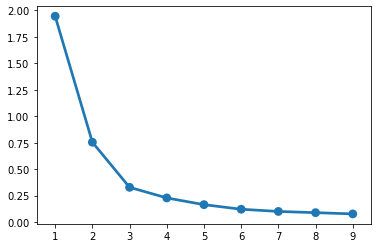

In [13]:
sns.pointplot(list(range(1,10)),wcss)

In [14]:
wcss

[1.9452076233849003,
 0.7540963759591796,
 0.3278478050693132,
 0.22760245765174864,
 0.16395152491640724,
 0.12059896172575112,
 0.09983590959602927,
 0.0882378582518727,
 0.0764085902879394]

In [15]:
kmeans_model=KMeans(n_clusters=3,random_state=0).fit(norm_df)

In [16]:
kmeans_model.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1,
       2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 2, 1])

In [17]:
norm_df2=norm_df.copy()

In [18]:
norm_df2['labels']=kmeans_model.labels_

In [19]:
norm_df2.head()

,Murder,Assault,UrbanPop,Rape,labels
0,0.054031,0.966016,0.237411,0.086778,1
1,0.036872,0.969739,0.176987,0.164081,1
2,0.026439,0.959624,0.261122,0.101185,1
3,0.044528,0.961392,0.252998,0.098669,1
4,0.030657,0.940134,0.309972,0.138295,1


In [20]:
 from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2,random_state=0)

In [22]:
pca

PCA(n_components=2, random_state=0)

In [23]:
new_pca_data=pca.fit_transform(norm_df2.iloc[:,:-1])

In [24]:
pca_data=pd.DataFrame(new_pca_data,columns=['pca1','pca2'])

In [25]:
pca_data.head()

,pca1,pca2
0,-0.193388,0.009469
1,-0.240338,-0.072759
2,-0.168015,0.004070
3,-0.176497,0.002248
4,-0.113333,-0.024776


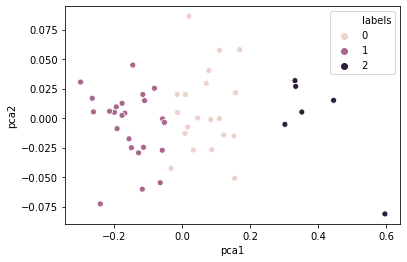

In [26]:
sns.scatterplot(x=pca_data['pca1'],y=pca_data['pca2'],hue=norm_df2['labels'])

# Hierarchical clustering

In [27]:
import scipy.cluster.hierarchy as shc

In [40]:
norm_df.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


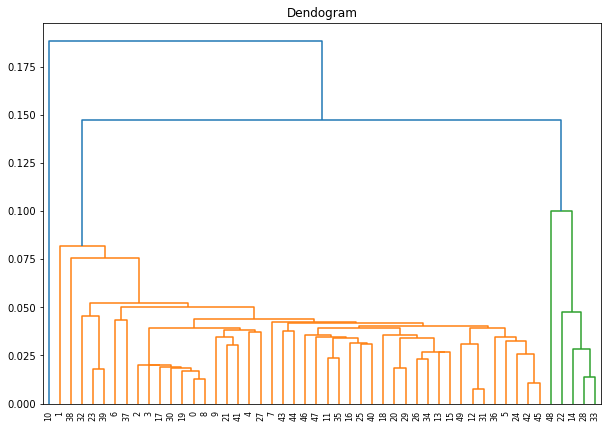

In [28]:
plt.figure(figsize=(10,7))
plt.title('Dendogram')
dend=shc.dendrogram(shc.linkage(norm_df,method='single'))


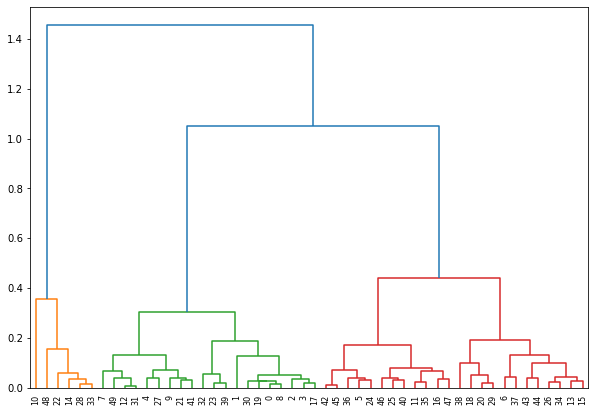

In [29]:
plt.figure(figsize=(10,7))

dend=shc.dendrogram(shc.linkage(norm_df,method='ward'))

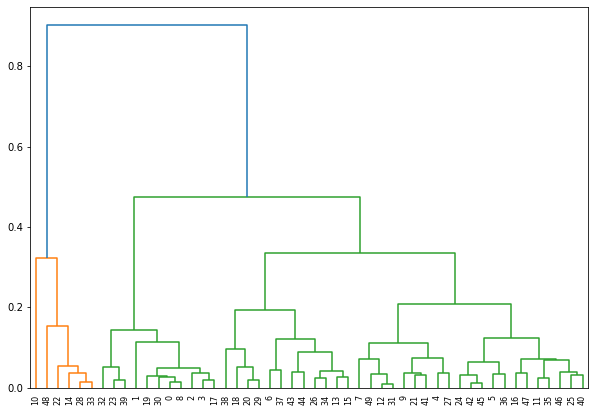

In [30]:
plt.figure(figsize=(10,7))
dend=shc.dendrogram(shc.linkage(norm_df,method='complete'))

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [44]:
cluster= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [45]:
cluster.fit_predict(norm_df)

array([2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 2], dtype=int64)

In [46]:
agc_lables=cluster.labels_

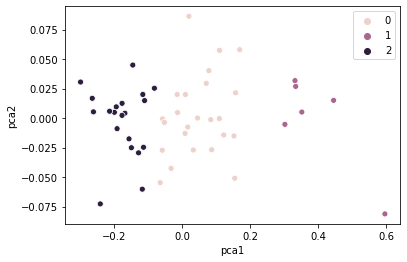

In [47]:
sns.scatterplot(x=pca_data['pca1'],y=pca_data['pca2'],hue=agc_lables)

# DBSCAN Clustering

In [36]:
from sklearn.cluster import DBSCAN

In [56]:
dbscan=DBSCAN(eps=0.03,min_samples=3).fit(pca_data)

In [60]:
db_labels=dbscan.labels_
db_labels

array([ 0, -1,  0,  0,  0,  3, -1, -1,  0,  0, -1,  1, -1,  2,  4,  2,  1,
        0, -1,  0, -1,  0, -1, -1,  3,  1,  2, -1,  4, -1,  0, -1, -1,  4,
        2,  1, -1, -1, -1, -1,  1,  0,  3, -1, -1,  3,  1,  1, -1, -1],
      dtype=int64)

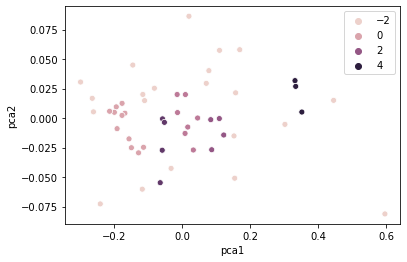

In [58]:
sns.scatterplot(x=pca_data['pca1'],y=pca_data['pca2'],hue=db_labels)